# Logistic Regression

## Jane Slagle

## Tues lab

## 11/13/22

In [18]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import statsmodels.api as sm
import time
from matplotlib import pyplot as plt

## Problem 1

Create a classifier called `LogiReg` that accepts an $(n \times 1)$ array $y$ of binary labels ($0$'s and $1$'s) as well as an $(n \times d)$ array $X$ of data points. Write a `fit()` method that finds and saves the optimal $\widehat{\boldsymbol{\beta}}$.

## Problem 2

Write a method called `predict_prob()` that accepts an $(n \times d)$ array $x\_test$ and returns $P(Y=1 | x\_test)$. Also write a method called `predict()` that calls `predict_prob()` and returns an array of predicted labels ($0$'s or $1$'s) for the given array $x\_test$.

In [140]:
class LogiReg():
    """ input:
        y: nparray(n, 1) taking values only in {0,1}
        X: nparray(n, d)
    """
    
    def __init__(self, y, X):
        """
        Save y and X as attributes.
        """
        self.y = y
        self.X = X
        self.X = sm.add_constant(self.X) #need add constant column to X: says so in lab manual
    
    def fit(self):
        """
        Updates beta, the coefficient array of shape (d, 1) that
        minimizes the negative log likelihood for the given data 
        with the model p(y|x) = sigm(x^T @ beta).      
        """
        #get class attributes so that can use them:
        y = self.y
        X = self.X
        
        #minimize using minimize function imported above
        #minimize func from above takes in func so need to plug in func of beta to find min one 
        #and the func is eq 10.2 given in lab manual:
        l = lambda b: np.sum(y*np.log(1+np.exp(-X@b)) + (1-y)*np.log(1+np.exp(X@b))) #eq 10.2
        init_guess = np.random.random(X.shape[1])  #need for minimize func
        opt_b = minimize(l, init_guess).x          #only want the x value from minimize
        self.opt_b = opt_b  #want save the optimal beta as class attribute
    
    def predict_prob(self, x_test):
        """
        Returns the predicted probability of an input x_test.
        If x_test has shape (p, q), then the predicted probability
        has shape (1, q).
        """ 
        #scipy.special.expit is sigmoid function
        return sp.special.expit(x_test@self.opt_b)  #equation for P(Y=1|x_test) = sigmoid function
    
    def predict(self, x_test):
        """
        Returns the predicted classification (1 or 0) of x_test.
        If x_test has shape (p, q), then the predicted classification
        has shape (1, q).
        """      
        #construct classifier where f_hat(x)=1 if P(Y=1|x) >= 1/2, f_hat(0)=0 otherwise
        #so want pointwise type func
        x_test = sm.add_constant(x_test)
        f_hat = [1 if self.predict_prob(x_) >= 0.5 else 0 for x_ in x_test]  #call predict_prob
        return f_hat  

## Problem 3

Test your classifier from the previous two problems using arrays $X$, $y$, and $X\_test$. Train your classifier on $X$ and $y$. Then generate a list of predicted labels using your trained classifier and $X\_test$, and use it to plot $X\_test$ with a different color for each predicted label.

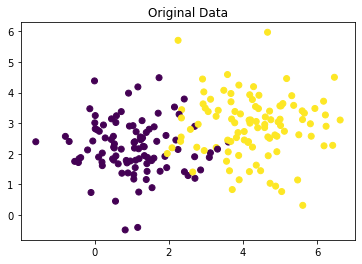

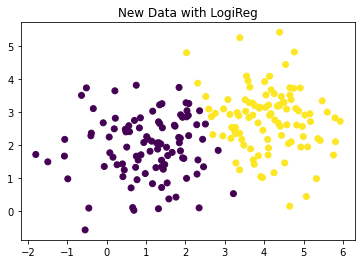

In [188]:
data = np.column_stack(( 
    np.concatenate(( 
        # draw from 2 2-dim. multivariate normal dists.
        np.random.multivariate_normal(np.array([1,2]), np.eye(2), 100),
        np.random.multivariate_normal(np.array([4,3]), np.eye(2), 100) )), 
    # labels corresonding to each distribution
    np.concatenate(( np.zeros(100), np.ones(100) )) ))
np.random.shuffle(data)
# extract X and y from the shuffled data
X = data[:,:2]
y = data[:,2].astype(int)

X_test = np.concatenate(( 
    # draw from 2 identical 2-dim. multivariate normal dists.
    np.random.multivariate_normal(np.array([1,2]), np.eye(2), 100),
    np.random.multivariate_normal(np.array([4,3]), np.eye(2), 100) ))
np.random.shuffle(X_test)

#going to use class objects to do this part:

log_regr = LogiReg(y, X)       #initialize class object
log_regr.fit()                 #fit data to train it
labels = log_regr.predict(X_test)  #generate list of predicted labels using predict w/ X_test

#plot the original data:
plt.scatter(X[:,0], X[:,1], c = y)  #y's are 0s and 1s so colored based on y
plt.title("Original Data")
plt.show()

#plot the X_test w/ predicted values
plt.scatter(X_test[:,0], X_test[:,1], c = labels)  #labels gives the 0s, 1s for X_test
plt.title("New Data with LogiReg")
plt.show()

## Problem 4

Using each of `LogiReg`, `statsmodels`, and `sklearn`, train a logistic regression classifier on $X$ and $y$ to generate a list of predicted labels for $X\_test$. Then, using $y\_test$, print the accuracy scores for each trained model. Compare the accuracies and training/testing time for all three classifiers. Be sure to add a constant feature with each model.

In [192]:
# predefine the true beta
beta = np.random.normal(0, 7, 20)

# X is generated from 2 20-dim. multivariate normal dists.
X = np.concatenate(( 
        np.random.multivariate_normal(np.zeros(20), np.eye(20), 100), 
        np.random.multivariate_normal(np.ones(20)*2, np.eye(20), 100) ))
np.random.shuffle(X)
# create y based on the true beta
pred = 1. / (1. + np.exp(-X @ beta))  
y = np.array( [1 if pred[i] >= 1/2 else 0 
            for i in range(pred.shape[0])] )

# X_test and y_test are generated similar to X and y
X_test = np.concatenate(( 
        np.random.multivariate_normal(np.zeros(20), np.eye(20), 100), 
        np.random.multivariate_normal(np.ones(20), np.eye(20), 100) ))
np.random.shuffle(X_test)
pred = 1. / (1. + np.exp(-X_test @ beta))
y_test = np.array( [1 if pred[i] >= 1/2 else 0 
            for i in range(pred.shape[0])] )


#do LogiReg:
start1 = time.time()
log_regr = LogiReg(y, X)                #initialize class object
log_regr.fit()                          #fit data to train it
logi_labels = log_regr.predict(X_test)  #generate list of predicted labels using predict w/ X_test
end1 = time.time()
logi_time = end1 - start1               

#do statsmodels:
start2 = time.time()
sm_X = sm.add_constant(X)               #need add constant column on
sm_model = sm.Logit(y, sm_X).fit_regularized(disp=0)
sm_X_test = sm.add_constant(X_test)     #need add constant column on
sm_probs = sm_model.predict(sm_X_test) #returns prob that in each category
sm_labels = [1 if x_ >= 0.5 else 0 for x_ in sm_probs] #need to turn it into labels: do something similar to predict func had
end2 = time.time()
sm_time = end2-start2

#do sklearn:
start3 = time.time()
sk_model = LogisticRegression(fit_intercept=True).fit(X, y)
sk_labels = sk_model.predict(X_test)
end3 = time.time()
sk_time = end3-start3

#using y_test: print accuracy scores for each trained model: w/ accuracy score: y_test = true_labels
logi_ac_score = accuracy_score(y_test, logi_labels)
sm_ac_score = accuracy_score(y_test, sm_labels)
sk_ac_score = accuracy_score(y_test, sk_labels)

print("LogiReg accuracy score: " + str(logi_ac_score))
print("statsmodels accuracy score: " + str(sm_ac_score))
print("sklearn accuracy score: " + str(sk_ac_score))
print("")

#print all times:
print("LogiReg time: " + str(logi_time))
print("statsmodels time: " + str(sm_time))
print("sklearn time " + str(sk_time))

print("")
print("Quinlan told me that I do not need to write a statement comparing them, he said that printing them all out is enough, so that is all I am doing. I think you Bryce grade my Tuesday labs and this is why I am including this. Toodaloo - Jane")

LogiReg accuracy score: 0.93
statsmodels accuracy score: 0.895
sklearn accuracy score: 0.92

LogiReg time: 0.04828643798828125
statsmodels time: 0.016080617904663086
sklearn time 0.010864973068237305

Quinlan told me that I do not need to write a statement comparing them, he said that printing them all out is enough, so that is all I am doing. I think you Bryce grade my Tuesday labs and this is why I am including this. Toodaloo - Jane


/home/jeslagle/.local/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


## Problem 5

Import the Iris Dataset and perform a train-test split on only the first two columns of the data with `test_size=0.4`. Train a multinomial logistic regression model using the training data with an added constant feature, and generate prediction labels for the test data.

Plot the test data by color using your prediction labels.

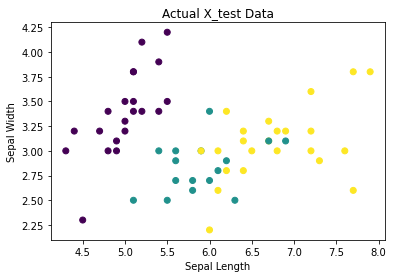

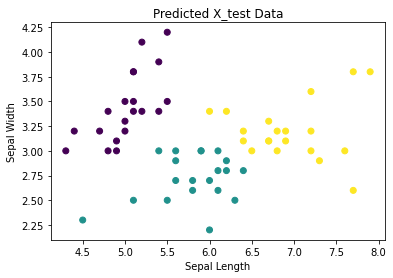

In [218]:
iris = datasets.load_iris()  #import Iris Dataset
X = iris.data[:,:2]          #our x is given by the data. only want 1st 2 cols of data
y = iris.target              #our y is given by target/labels (they are same thing)

#train test split on only 1st 2 cols of data w/ test_size = 0.4: splits data into training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

#train multinomial logistic regression model using training data w/ added constant feature:
iris_model = LogisticRegression(multi_class='multinomial',fit_intercept=True).fit(X_train, y_train) # add constant feature

#generate prediction labels for test data:
iris_labels = iris_model.predict(X_test)

#plot the test data by color using your prediction labels:
#plot the original data:
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)  #y's are 0s and 1s so colored based on y_test
plt.title("Actual X_test Data")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

#plot the X_test w/ predicted values
plt.scatter(X_test[:,0], X_test[:,1], c = iris_labels)  #labels gives the 0s, 1s for iris_labels
plt.title("Predicted X_test Data")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()